# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import openweathermapy as ow
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid={}".format(api_key)
units = "imperial"

container_list = []
print("Beginning Data Retrieval")
Record_counter = 1
Set = 1

for i, city in enumerate(cities):
    if(i%10 == 0 and i>=10):
        Set += 1
        Record_counter=0
    query_url = f"{base_url}&q={city}&units={units}"
    print("Processing Record %s of Set %s | %s" %(Record_counter, Set, city)) 
    Record_counter += 1
    try:
        weather=requests.get(query_url).json()

        temp = weather["main"]["temp"]
        date = weather["dt"]
        cntry = weather["sys"]["country"]
        humid = weather["main"]["humidity"]  
        cloud = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        lat = weather ["coord"]["lat"]
        lng = weather ["coord"]["lon"]
        container_list.append({
            "City name":city,
            "Date":date,
            "Country":cntry,
            "Temperature":temp,
            "Humidity":humid,
            "Cloud":cloud,
            "Windspeed":wind,
            "Latitude":lat,
            "Longitude":lng 
        })
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
Processing Record 1 of Set 1 | shenjiamen
Processing Record 2 of Set 1 | manoel urbano
Processing Record 3 of Set 1 | thunder bay
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 0 of Set 2 | albany
Processing Record 1 of Set 2 | busselton
Processing Record 2 of Set 2 | bengkulu
City not found. Skipping...
Processing Record 3 of Set 2 | punta arenas
Processing Record 4 of Set 2 | upernavik
Processing Record 5 of Set 2 | khatanga
Processing Record 6 of Set 2 | kadykchan
City not found. Skipping...
Processing Record 7 of Set 2 | akyab
City not found. Skipping...
Processing Record 8 of Set 2 | leningradskiy
Processing Record 9 of Set 2 | tuktoyaktuk
Processing Record 0 of Set 3 |

Processing Record 4 of Set 19 | natal
Processing Record 5 of Set 19 | buala
Processing Record 6 of Set 19 | cabra
Processing Record 7 of Set 19 | povenets
Processing Record 8 of Set 19 | redlands
Processing Record 9 of Set 19 | zhaocheng
City not found. Skipping...
Processing Record 0 of Set 20 | la ronge
Processing Record 1 of Set 20 | zalantun
Processing Record 2 of Set 20 | coquimbo
Processing Record 3 of Set 20 | port hardy
Processing Record 4 of Set 20 | sofiysk
City not found. Skipping...
Processing Record 5 of Set 20 | hameenlinna
Processing Record 6 of Set 20 | airai
Processing Record 7 of Set 20 | rio gallegos
Processing Record 8 of Set 20 | nevers
Processing Record 9 of Set 20 | pathein
Processing Record 0 of Set 21 | ayer itam
City not found. Skipping...
Processing Record 1 of Set 21 | kavaratti
Processing Record 2 of Set 21 | nome
Processing Record 3 of Set 21 | samoded
Processing Record 4 of Set 21 | saint-pierre
Processing Record 5 of Set 21 | kavieng
Processing Record 6 

City not found. Skipping...
Processing Record 0 of Set 38 | tiznit
Processing Record 1 of Set 38 | santa rosalia
Processing Record 2 of Set 38 | fortuna
Processing Record 3 of Set 38 | lubango
Processing Record 4 of Set 38 | ribeirao branco
Processing Record 5 of Set 38 | ketchikan
Processing Record 6 of Set 38 | rudnogorsk
Processing Record 7 of Set 38 | launceston
Processing Record 8 of Set 38 | cedar city
Processing Record 9 of Set 38 | cananea
Processing Record 0 of Set 39 | angouleme
Processing Record 1 of Set 39 | egvekinot
Processing Record 2 of Set 39 | pudozh
Processing Record 3 of Set 39 | sitka
Processing Record 4 of Set 39 | laguna de perlas
Processing Record 5 of Set 39 | varhaug
Processing Record 6 of Set 39 | viligili
City not found. Skipping...
Processing Record 7 of Set 39 | pangnirtung
Processing Record 8 of Set 39 | sangar
Processing Record 9 of Set 39 | maltahohe
Processing Record 0 of Set 40 | mahibadhoo
Processing Record 1 of Set 40 | omagari
Processing Record 2 o

Processing Record 6 of Set 56 | mbamba
Processing Record 7 of Set 56 | genhe
Processing Record 8 of Set 56 | gbarnga
Processing Record 9 of Set 56 | petit goave
Processing Record 0 of Set 57 | pemangkat
City not found. Skipping...
Processing Record 1 of Set 57 | guerrero negro
Processing Record 2 of Set 57 | qaqortoq
Processing Record 3 of Set 57 | la ligua
Processing Record 4 of Set 57 | sao sebastiao
Processing Record 5 of Set 57 | arawa
Processing Record 6 of Set 57 | taltal
Processing Record 7 of Set 57 | saint-nazaire
Processing Record 8 of Set 57 | samusu
City not found. Skipping...
Processing Record 9 of Set 57 | morondava
Processing Record 0 of Set 58 | kuloy
Processing Record 1 of Set 58 | birao
Processing Record 2 of Set 58 | soyo
Processing Record 3 of Set 58 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 58 | benguela
Processing Record 5 of Set 58 | coihaique
Processing Record 6 of Set 58 | bonavista
Processing Record 7 of Set 58 | itamaraca
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame(container_list)
city = cities_df["City name"]
cntry = cities_df["Country"]
date = cities_df["Date"]
temp = cities_df["Temperature"]
humidity = cities_df["Humidity"]
cloud = cities_df["Cloud"]
wind = cities_df["Windspeed"]
lat = cities_df["Latitude"]
lat = cities_df["Longitude"]
cities_df.head()

,City name,Cloud,Country,Date,Humidity,Latitude,Longitude,Temperature,Windspeed
0,shenjiamen,20,CN,1554425966,98,29.96,122.30,55.79,11.54
1,manoel urbano,8,BR,1554426399,87,-8.84,-69.26,80.00,2.37
2,thunder bay,75,CA,1554426179,63,48.41,-89.26,29.70,10.29
3,port elizabeth,1,US,1554425838,40,39.31,-74.98,51.91,4.70
4,yerbogachen,76,RU,1554425920,86,61.28,108.01,23.75,4.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

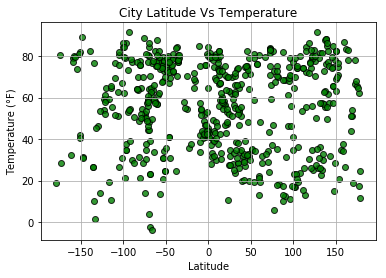

In [5]:
plt.scatter(lat, temp, color = "g", alpha = .8, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Temperature")

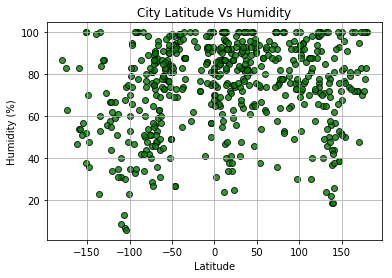

In [6]:
plt.scatter(lat, humidity, color = "g", alpha = .8, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Humidity") 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Humidity")

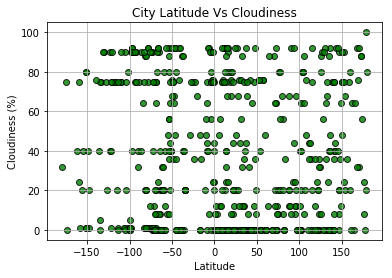

In [7]:
plt.scatter(lat, cloud, color = "g", alpha = .8, marker = "o", edgecolor = "black")   
plt.title("City Latitude Vs Cloudiness") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Cloudiness")

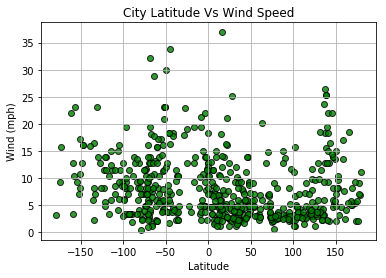

In [8]:
plt.scatter(lat, wind, color = "g", alpha = .8, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Wind Speed") 
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.savefig("Weather_images/City Latitude Vs Wind")

In [9]:
cities_df.to_csv("CitiesWeather_Output.csv")
cities_df.head(2)

,City name,Cloud,Country,Date,Humidity,Latitude,Longitude,Temperature,Windspeed
0,shenjiamen,20,CN,1554425966,98,29.96,122.30,55.79,11.54
1,manoel urbano,8,BR,1554426399,87,-8.84,-69.26,80.00,2.37
